In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

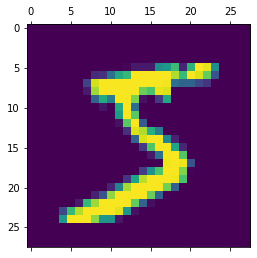

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4877 - accuracy: 0.8778: 0s
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3063 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2853 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2746 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9258


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.9254


[0.26562708616256714, 0.9254000186920166]

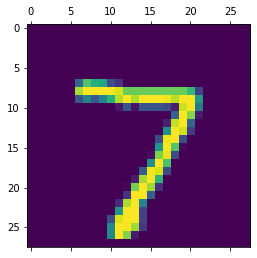

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.5117103e-05, 1.8011018e-10, 4.6314308e-05, 8.2788169e-03,
       1.0079256e-06, 7.5076023e-05, 1.0940714e-09, 7.3889041e-01,
       7.4229392e-05, 8.3586574e-04], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1112,    2,    2,    0,    1,    4,    2,   12,    0],
       [   7,    9,  923,   14,    9,    6,   13,   11,   36,    4],
       [   4,    0,   20,  903,    0,   40,    2,   12,   23,    6],
       [   1,    1,    2,    1,  920,    0,   12,    4,   10,   31],
       [  10,    3,    3,   20,   10,  789,   14,    7,   28,    8],
       [  11,    3,    7,    0,    7,   15,  910,    2,    3,    0],
       [   1,    6,   25,    4,    7,    1,    0,  945,    2,   37],
       [   5,    7,    6,   16,    9,   32,    9,   12,  871,    7],
       [  10,    7,    1,    8,   28,    7,    0,   21,    7,  920]])>

Text(69.0, 0.5, 'Truth')

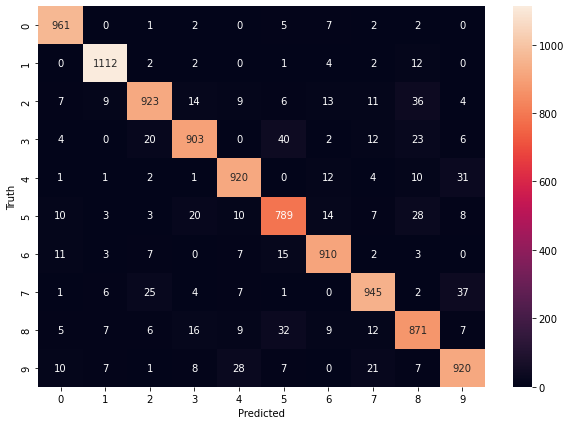

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2907 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - accuracy: 0.9607
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0968 - accuracy: 0.9715
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9783
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9816


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9725


[0.08561588823795319, 0.9725000262260437]

Text(69.0, 0.5, 'Truth')

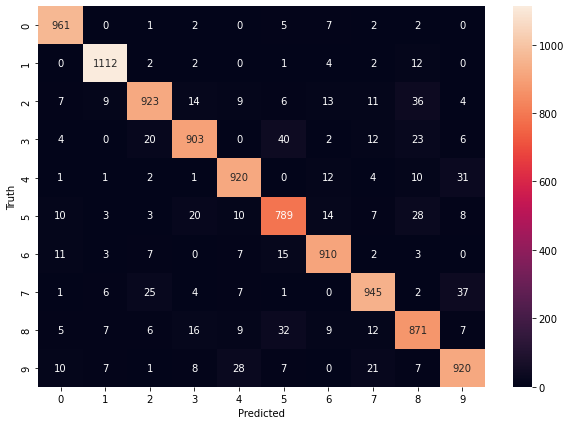

In [27]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')